# SQL

Вывести список сотрудников, получающих заработную плату выше 50000. Формат вывода - список ID

```sql
SELECT id
FROM employee
WHERE salary > 50000;
```

Вывести названия всех отделов, где количество сотрудников, зарабатывающих более 50000, менее пяти. Вывести поля: Название отдела, количество сотрудников.


```sql
SELECT d.name, COUNT(salary) AS cnt_emp
FROM employee As e
LEFT JOIN department AS d ON d.id = e.department_id
WHERE salary > 50000
GROUP BY department_id
HAVING COUNT(salary) < 5;
```

Вывести список сотрудников с минимальной заработной платой в своих отделах в формате ID, ФИО, Название отдела

Вариант 1

```sql
WITH t AS (

SELECT e.id, e.name As emp_name, d.name AS dep_name, e.salary, 
                                   CASE WHEN (MIN(e.salary) over (PARTITION by e.department_id)=e.salary) THEN 1 ELSE 0 END AS min_salary
FROM employee As e
LEFT JOIN department AS d ON d.id = e.department_id
)
SELECT id, emp_name, dep_name
FROM t
WHERE min_salary = 1
```

Вариант 2

```sql
SELECT e.id, e.name AS emp_name, m.name AS dep_name
FROM employee AS e
JOIN (SELECT t.department_id, d.name, MIN(salary) AS min_salary
FROM employee as t
JOIN department As d ON t.department_id=d.id
GROUP BY department_id) AS m ON m.department_id=e.department_id AND m.min_salary=e.salary
ORDER BY m.name
```

# API

С помощью запроса к методу /characters API https://anapioficeandfire.com/, нужно составить список актёров (см. в ответе API ключ playedBy), чьи персонажи из Вестероса и живы (culture=Westeros, isAlive=true).

In [ ]:
!pip install requests

In [ ]:
import requests
import json
import pandas as pd

In [ ]:
url = str('https://www.anapioficeandfire.com/api/characters/')
params = {
          "culture":"Westeros",
          "isAlive":"True"

        }
response = requests.get(url, params = params)
data = response.json()
cnt=0
rows=[]
rows2=[]
for i in range(len(data)):
  cnt+=1
  a = str(data[i]['name'])
  rows.append(str(a))
  rows2.append(str(data[i]['playedBy'])[2:-2])


print(f'Количество живых персонажей Westeros: {cnt}')

Количество живых персонажей Westeros: 10


In [ ]:
actor = pd.DataFrame({'name_character':rows, 'name_actor':rows2})

In [ ]:
actor

,name_character,name_actor
0,Margaery Tyrell,Natalie Dormer
1,Arstan Selmy,
2,Barristan Selmy,Ian McElhinney
3,Grenn,Mark Stanley
4,Ilyn Payne,Wilko Johnson
5,Jeyne Darry,
6,Mary Mertyns,
7,Davos Seaworth,Liam Cunningham
8,Jeyne Waters,
9,Shiera Seastar,


# Статистика

Был проведен A/B-тест на конверсию. Объемы групп одинаковые, по 500 клиентов. В группе А случилось 99 целевых событий; в группе В - 101. Какие выводы мы можем сделать на основе этих данных? Какая дополнительная информация может быть полезна, на что еще стоит обратить внимание?

In [ ]:
import numpy as np
from scipy import stats as st
import math as mth

In [ ]:
from scipy.stats import chi2_contingency

alpha = 0.05
print(f'Критический уровень статистической значимости: {alpha}')

observed_values = np.array([[99, 101], [401, 399]])

chi2, p_value, ddof, expected = chi2_contingency(observed_values, correction=False,lambda_="log-likelihood")
print(f'Успех Шаблона А: {observed_values[0][0] / observed_values[1][0]:.3f}', \
      f'Успех Шаблона Б: {observed_values[0][1] / observed_values[1][1]:.3f}', sep='\n')
print(f'Количество степеней свободы: {ddof}')  # степени свободы
print(f'Значение Хи-квадрат: {chi2:.3f}')  # Хи-квадрат
print(f'Значение p-value: {p_value:.3f}')
if p_value < alpha:
  print('Отвергаем нулевую гипотезу, между долями есть значимая разница')
else:
  print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

Критический уровень статистической значимости: 0.05
Успех Шаблона А: 0.247
Успех Шаблона Б: 0.253
Количество степеней свободы: 1
Значение Хи-квадрат: 0.025
Значение p-value: 0.874
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


# Вывод

Т.к. p-value гораздо больше критического уровня значимости, мы не можем отвергнуть нулевую гипотезу.  
Нулевая гипотеза в нашем случае звучит так - *конверсии в выборках одинаковые*.  
Необходимые уточнения:
* Было бы полезно знать какая цель и задача у данного эксперимента? 
* Как долго проводился эксперимент?
* Проводился ли А/А тест при разбиении на группы?

Необходимо обратить внимание, что такой результат мы могли получить случайно и требуется дополнительные эксперименты.


# Classic ML

Во вложении sample.xlsx содержится таблица с данными по 5000 клиентов в следующей кодификации:												
* No : Порядковый номер клиента				
* predictor1-7* : Фичи (предикторы) по которым необходимо построить модель. 
* Target : Целевая бинарная переменная, обозначающая факт дефолта клиента	


# Анализ данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_excel('/content/sample.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           10000 non-null  int64  
 1   predictor 1  10000 non-null  int64  
 2   predictor 2  10000 non-null  int64  
 3   predictor 3  8087 non-null   float64
 4   predictor 4  10000 non-null  int64  
 5   predictor 5  10000 non-null  float64
 6   predictor 6  8522 non-null   object 
 7   predictor 7  10000 non-null  object 
 8   target       10000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 703.2+ KB


In [ ]:
df.head()

,No,predictor 1,predictor 2,predictor 3,predictor 4,predictor 5,predictor 6,predictor 7,target
0,1,12423,710,441.5,5,4631.0,D4,B1,1
1,2,13983,1106,NaN,3,4256.0,D5,B1,1
2,3,15520,1276,391.5,1,4397.0,NaN,B1,0
3,4,29535,1106,NaN,1,3772.0,D4,B2,1
4,5,26154,976,315.0,5,2445.0,D3,B1,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,10000.0,5000.500000,2886.895680,1.0,2500.750,5000.5,7500.250,10000.0
predictor 1,10000.0,20107.924800,12679.903068,7.0,9651.250,18850.0,28010.500,49996.0
predictor 2,10000.0,1123.810200,146.337209,564.0,1050.000,1106.0,1214.000,1450.0
predictor 3,8087.0,368.662174,68.536786,62.0,325.000,377.5,419.000,512.5
predictor 4,10000.0,3.490400,3.827607,1.0,1.000,3.0,5.000,49.0
predictor 5,10000.0,2518.598750,1447.114231,0.5,1261.375,2536.5,3765.125,5000.0
target,10000.0,0.195500,0.396605,0.0,0.000,0.0,0.000,1.0


In [ ]:
df.duplicated().sum()

0

В данных присутствуют пропуски в столбцах `predictor 3` и `predictor 6`.  
Дубликатов нет.

In [ ]:
df.nunique()

No             10000
predictor 1     8868
predictor 2      398
predictor 3      627
predictor 4       22
predictor 5     5782
predictor 6        5
predictor 7        2
target             2
dtype: int64

Оценим корреляцию между предикторами:

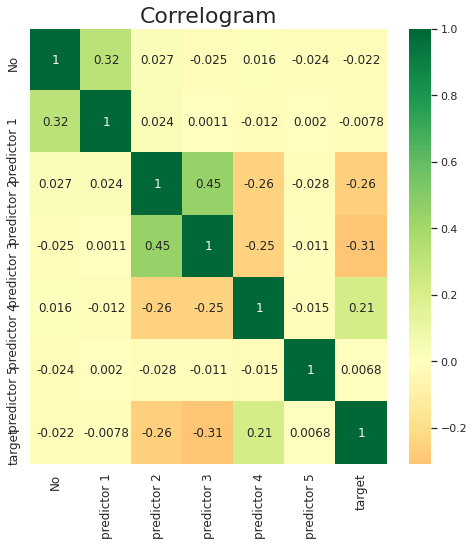

In [ ]:
# Plot
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Мультиколлениарность в фичах отсутствует.

In [ ]:
df.columns = ['no', 'predictor_1','predictor_2', 'predictor_3', 'predictor_4', 'predictor_5', 'predictor_6', 'predictor_7', 'target']

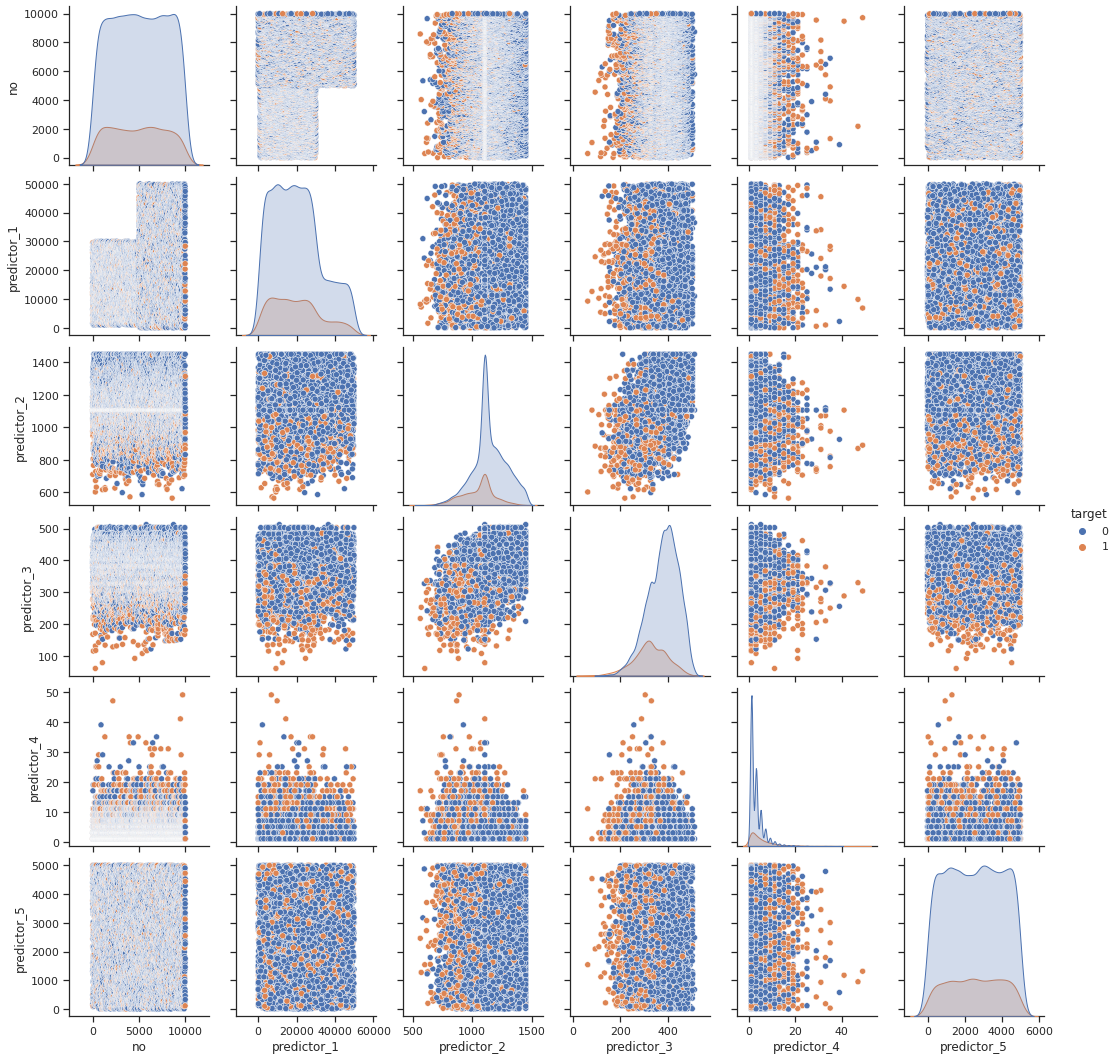

In [ ]:
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(data=df, hue='target')

Как мы видим из графиков, доля положительного класса меньше.  
Распределения классов отчасти похожи друг на друга.  
Видна линейная зависимость 3 и 4 предиктора.

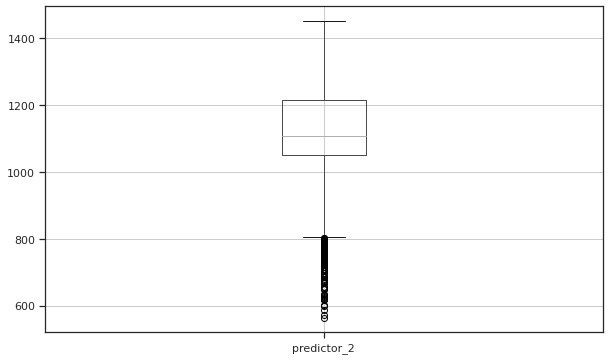

In [ ]:
df.boxplot(column=['predictor_2']);

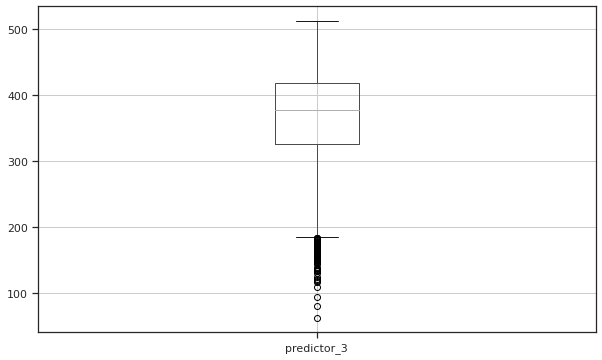

In [ ]:
df.boxplot(column=['predictor_3']);

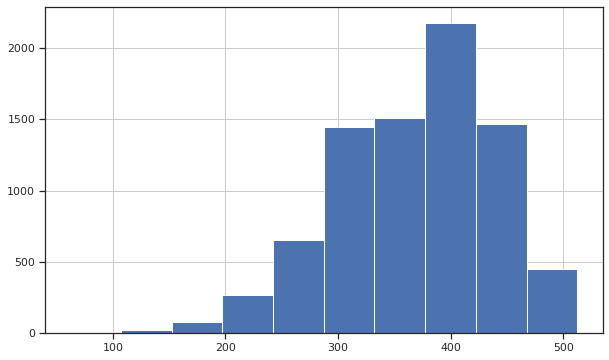

In [ ]:
df['predictor_3'].hist();

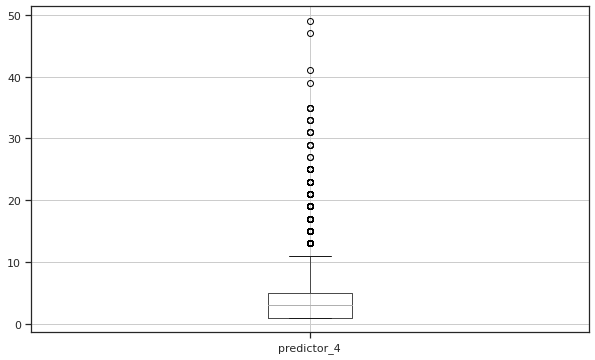

In [ ]:
df.boxplot(column=['predictor_4']);

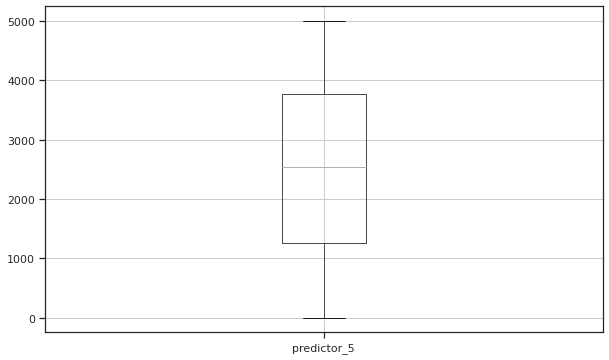

In [ ]:
df.boxplot(column=['predictor_5']);

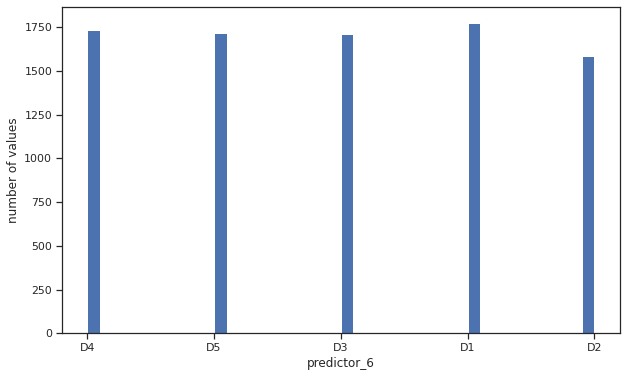

In [ ]:
plt.hist(df['predictor_6'].dropna(axis=0), bins=40)
plt.xlabel('predictor_6')
plt.ylabel('number of values')
plt.show()

## Заполнение пропусков

In [ ]:
# полная таблица
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no,10000.0,5000.500000,2886.895680,1.0,2500.750,5000.5,7500.250,10000.0
predictor_1,10000.0,20107.924800,12679.903068,7.0,9651.250,18850.0,28010.500,49996.0
predictor_2,10000.0,1123.810200,146.337209,564.0,1050.000,1106.0,1214.000,1450.0
predictor_3,8087.0,368.662174,68.536786,62.0,325.000,377.5,419.000,512.5
predictor_4,10000.0,3.490400,3.827607,1.0,1.000,3.0,5.000,49.0
predictor_5,10000.0,2518.598750,1447.114231,0.5,1261.375,2536.5,3765.125,5000.0
target,10000.0,0.195500,0.396605,0.0,0.000,0.0,0.000,1.0


In [ ]:
# таблица с пропусками
df[df['predictor_3'].isna() | df['predictor_6'].isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
no,3105.0,4860.185185,2852.835311,2.0,2396.000,4772.0,7252.00,9997.0
predictor_1,3105.0,19677.681804,12406.089173,15.0,9595.000,18462.0,27473.00,49996.0
predictor_2,3105.0,1123.963285,129.927368,586.0,1104.000,1106.0,1178.00,1450.0
predictor_3,1192.0,373.968121,65.092667,146.0,330.375,383.0,421.25,505.5
predictor_4,3105.0,2.814493,3.237841,1.0,1.000,1.0,3.00,33.0
predictor_5,3105.0,2510.322222,1451.952779,4.0,1271.500,2498.5,3757.50,4996.0
target,3105.0,0.164251,0.370563,0.0,0.000,0.0,0.00,1.0


Есть зависимость в некоторых предикторах в миинимальных/максимальных значениях основной таблицы с данными и таблицы с пропусками в столбцах `predictor 3`, `predictor 6`.

У нас есть два пути по борьбе с пропусками, удалить их или заполнить.  
Выбирать стратегию по заполнению, я бы начал с уточнения причин их возникновения.  Т.к. данная информация отсутствует, выполним следующее:
1. Заполним пропуски `predictor 3` медианой.
2. Заполним пропуски `predictor 6` значением "Unknown"

In [ ]:
df_new = df.copy()

In [ ]:
df_new['predictor_3'].median()

377.5

In [ ]:
df_new['predictor_3'] = df_new['predictor_3'].fillna(df_new['predictor_3'].median())

In [ ]:
df_new['predictor_6'] = df_new['predictor_6'].fillna('unknown')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no           10000 non-null  int64  
 1   predictor_1  10000 non-null  int64  
 2   predictor_2  10000 non-null  int64  
 3   predictor_3  10000 non-null  float64
 4   predictor_4  10000 non-null  int64  
 5   predictor_5  10000 non-null  float64
 6   predictor_6  10000 non-null  object 
 7   predictor_7  10000 non-null  object 
 8   target       10000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 703.2+ KB


In [ ]:
df_new.head()

,no,predictor_1,predictor_2,predictor_3,predictor_4,predictor_5,predictor_6,predictor_7,target
0,1,12423,710,441.5,5,4631.0,D4,B1,1
1,2,13983,1106,377.5,3,4256.0,D5,B1,1
2,3,15520,1276,391.5,1,4397.0,unknown,B1,0
3,4,29535,1106,377.5,1,3772.0,D4,B2,1
4,5,26154,976,315.0,5,2445.0,D3,B1,1


Оценим изменившийся dataset:

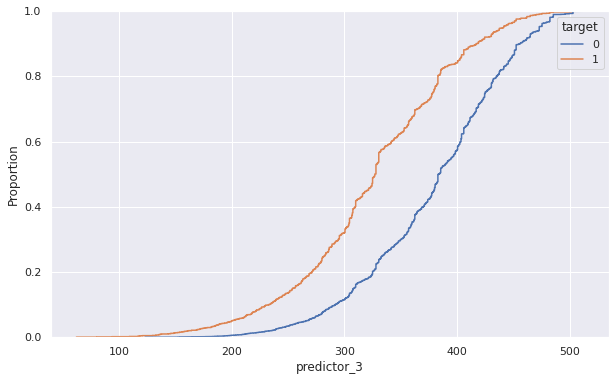

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.ecdfplot(data=df, x="predictor_3", hue="target", stat='proportion');

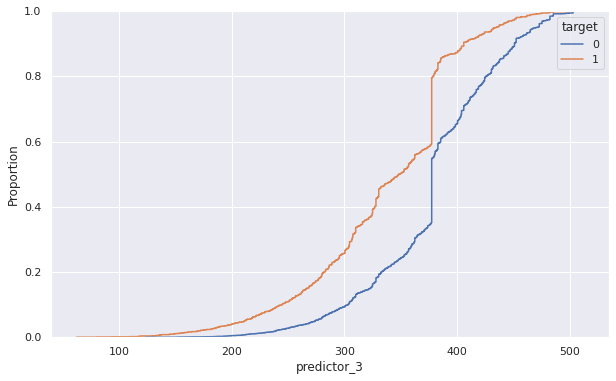

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.ecdfplot(data=df_new, x="predictor_3", hue="target", stat='proportion');

Как мы видим, заполнение пропусков в `predictor_6` очень серьезно изменило соотношение пропорций, как раз для точки равной медиане. Это приведет к уменьшению предсказательной способности модели. 

In [ ]:
df['target'].value_counts(normalize=True) * 100

0    80.45
1    19.55
Name: target, dtype: float64

In [ ]:
df['predictor_7'].value_counts(normalize=True) * 100

B2    50.11
B1    49.89
Name: predictor_7, dtype: float64

In [ ]:
df_new['predictor_6'].value_counts(normalize=True) * 100

D1         17.76
D4         17.32
D5         17.15
D3         17.11
D2         15.88
unknown    14.78
Name: predictor_6, dtype: float64

In [ ]:
df['predictor_4'].value_counts(normalize=True) * 100

1     46.91
3     24.88
5     12.32
7      6.43
9      3.50
11     2.23
13     1.15
15     0.77
17     0.55
19     0.50
21     0.28
23     0.15
25     0.11
33     0.04
29     0.04
35     0.04
31     0.04
27     0.02
41     0.01
49     0.01
39     0.01
47     0.01
Name: predictor_4, dtype: float64

# Вывод

В данных присутствуют пропуски в столбцах predictor 3 и predictor 6.
Дубликатов нет.  

Мультиколлениарность в фичах отсутствует.  

Создан новый DataFrame с заполненными пропущенными значениями.  

В данных присутствует дисбаланс классов. Доля положительного класса 20%.



# Построение моделей

Проведем обучение моделей **LogisticRegression** и **DecisionTreeClassifier** для данных с удаленными пропусками и заполненными.  
В качестве метрики выберем f1, это среднее гармоническое точности и полноты. Она наиболее точно позволит нам оценить качество предсказания модели, как положительного, так и отрицательного класса. 

## Модели с заполненными пропусками

Проведем кодирование категориальных данных методом Oridinal Encoder

## Oridinal Encoder (OE)

In [ ]:
df_new

,no,predictor_1,predictor_2,predictor_3,predictor_4,predictor_5,predictor_6,predictor_7,target
0,1,12423,710,441.5,5,4631.0,D4,B1,1
1,2,13983,1106,377.5,3,4256.0,D5,B1,1
2,3,15520,1276,391.5,1,4397.0,unknown,B1,0
3,4,29535,1106,377.5,1,3772.0,D4,B2,1
4,5,26154,976,315.0,5,2445.0,D3,B1,1
...,...,...,...,...,...,...,...,...,...
9995,9996,17220,1450,421.5,3,1759.0,D3,B2,0
9996,9997,6173,1100,377.5,1,4521.0,D5,B1,0
9997,9998,41944,1122,311.0,13,4087.0,D2,B2,0
9998,9999,28381,1314,182.0,1,4439.0,D1,B2,1


In [ ]:
enc = OrdinalEncoder()
enc.fit(df_new[["predictor_6","predictor_7"]])
df_new[["predictor_6","predictor_7"]] = enc.transform(df_new[["predictor_6","predictor_7"]])

In [ ]:
features = df_new.drop(['target', 'no'], axis=1)
target = df_new['target']

In [ ]:
features.head()

,predictor_1,predictor_2,predictor_3,predictor_4,predictor_5,predictor_6,predictor_7
0,12423,710,441.5,5,4631.0,3.0,0.0
1,13983,1106,377.5,3,4256.0,4.0,0.0
2,15520,1276,391.5,1,4397.0,5.0,0.0
3,29535,1106,377.5,1,3772.0,3.0,1.0
4,26154,976,315.0,5,2445.0,2.0,0.0


In [ ]:
# отделим 20% данных для тестовой выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345, stratify=target)

In [ ]:
print(features.shape)
print(features_train.shape)
print(features_test.shape)

(10000, 7)
(8000, 7)
(2000, 7)


## LogisticRegression

In [ ]:
%%time

lr = LogisticRegression(random_state=12345, class_weight='balanced') 
scores_lr = cross_val_score(lr, features_train, target_train, 
                              scoring='f1', cv=5)
f1_scores_lr = scores_lr.mean()
print('Среднее значение F1 при кросс-валидации LogisticRegression =', f1_scores_lr)

Среднее значение F1 при кросс-валидации LogisticRegression = 0.389930411634165
CPU times: user 520 ms, sys: 448 ms, total: 968 ms
Wall time: 508 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lr.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
f1_scores_lr = f1_score(target_test, lr.predict(features_test))

In [ ]:
print(classification_report(target_test, lr.predict(features_test)))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1609
           1       0.34      0.48      0.40       391

    accuracy                           0.72      2000
   macro avg       0.60      0.63      0.61      2000
weighted avg       0.76      0.72      0.73      2000



In [ ]:
probabilities = lr.predict_proba(features_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])

In [ ]:
auc_roc_lr = roc_auc_score(target_test, probabilities[:,1])

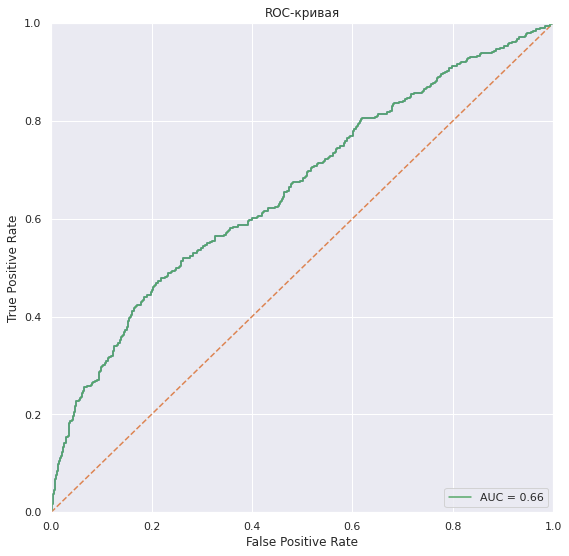

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % auc_roc_lr)
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid(True)
plt.show()

## DecisionTreeClassifier

In [ ]:
%%time

dtc = DecisionTreeClassifier(random_state=12345, class_weight='balanced') 
scores_dtc = cross_val_score(dtc, features_train, target_train, 
                              scoring='f1', cv=5)
f1_scores_dtc = scores_dtc.mean()
print('Среднее значение F1 при кросс-валидации DecisionTreeClassifier =', f1_scores_dtc)

Среднее значение F1 при кросс-валидации DecisionTreeClassifier = 0.3008777266975448
CPU times: user 239 ms, sys: 299 µs, total: 239 ms
Wall time: 241 ms


In [ ]:
dtc.fit(features_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [ ]:
f1_scores_dtc = f1_score(target_test, dtc.predict(features_test))

In [ ]:
print(classification_report(target_test, dtc.predict(features_test)))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1609
           1       0.33      0.34      0.34       391

    accuracy                           0.74      2000
   macro avg       0.59      0.59      0.59      2000
weighted avg       0.74      0.74      0.74      2000



In [ ]:
probabilities = dtc.predict_proba(features_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])

In [ ]:
auc_roc_dtc = roc_auc_score(target_test, probabilities[:,1])

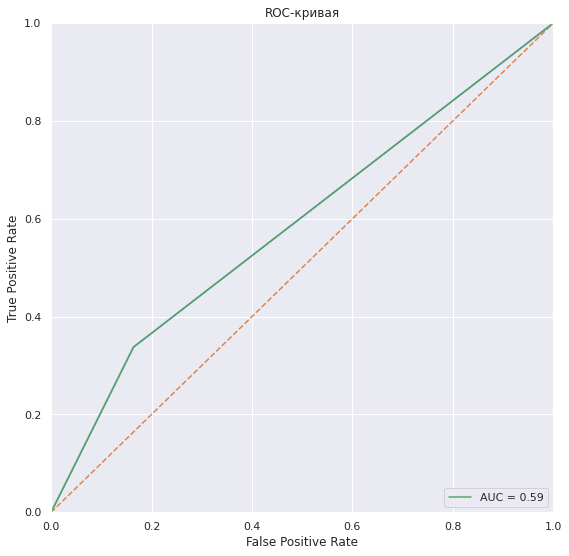

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % auc_roc_dtc)
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid(True)
plt.show()

In [ ]:
data = pd.DataFrame({'f1_fillnan':[f1_scores_lr,f1_scores_dtc],
                                    'auc_roc_fillnan':[auc_roc_lr,auc_roc_dtc]},
                                   index=['LogisticRegression','DecisionTreeClassifier'])
data

,f1_fillnan,auc_roc_fillnan
LogisticRegression,0.397884,0.659374
DecisionTreeClassifier,0.335451,0.586759


## Модели с удаленными пропусками


Учитывая плохую предсказательную способность моделей попробуем удалить пропуски и обучить модели:

In [ ]:
# индексы пропусков основной таблицы
nan_index = df[df['predictor_3'].isna() | df['predictor_6'].isna()].index

In [ ]:
df_not_nan = df_new.loc[~df_new.index.isin(nan_index)].copy()

In [ ]:
df_not_nan

,no,predictor_1,predictor_2,predictor_3,predictor_4,predictor_5,predictor_6,predictor_7,target
0,1,12423,710,441.5,5,4631.0,3.0,0.0,1
4,5,26154,976,315.0,5,2445.0,2.0,0.0,1
5,6,6477,1188,377.0,3,1311.5,4.0,0.0,0
8,9,4324,1170,416.0,7,148.5,2.0,0.0,1
9,10,11729,1054,277.5,7,348.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
9994,9995,796,1302,410.0,5,4286.0,2.0,0.0,0
9995,9996,17220,1450,421.5,3,1759.0,2.0,1.0,0
9997,9998,41944,1122,311.0,13,4087.0,1.0,1.0,0
9998,9999,28381,1314,182.0,1,4439.0,0.0,1.0,1


In [ ]:
nn_features = df_not_nan.drop(['target', 'no'], axis=1)
nn_target = df_not_nan['target']

In [ ]:
nn_features.shape

(6895, 7)

In [ ]:
# отделим 20% данных для тестовой выборки
features_train, features_test, target_train, target_test = train_test_split(
    nn_features, nn_target, test_size=0.20, random_state=12345, stratify=nn_target)

In [ ]:
print(nn_features.shape)
print(features_train.shape)
print(features_test.shape)

(6895, 7)
(5516, 7)
(1379, 7)


## LogisticRegression

In [ ]:
%%time

lr = LogisticRegression(random_state=12345, class_weight='balanced') 
scores_lr = cross_val_score(lr, features_train, target_train, 
                              scoring='f1', cv=5)
f1_scores_lr = scores_lr.mean()
print('Среднее значение F1 при кросс-валидации LogisticRegression =', f1_scores_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Среднее значение F1 при кросс-валидации LogisticRegression = 0.4352869227376672
CPU times: user 488 ms, sys: 385 ms, total: 873 ms
Wall time: 489 ms


In [ ]:
lr.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
f1_scores_lr = f1_score(target_test, lr.predict(features_test))

In [ ]:
print(classification_report(target_test, lr.predict(features_test)))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1090
           1       0.37      0.56      0.45       289

    accuracy                           0.71      1379
   macro avg       0.62      0.66      0.63      1379
weighted avg       0.76      0.71      0.73      1379



In [ ]:
probabilities = lr.predict_proba(features_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])

In [ ]:
auc_roc_lr = roc_auc_score(target_test, probabilities[:,1])

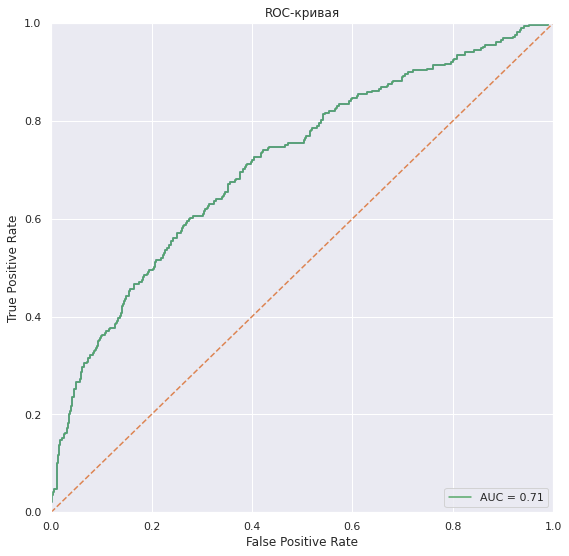

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % auc_roc_lr)
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid(True)
plt.show()

## DecisionTreeClassifier

In [ ]:
%%time

dtc = DecisionTreeClassifier(random_state=12345, class_weight='balanced') 
scores_dtc = cross_val_score(dtc, features_train, target_train, 
                              scoring='f1', cv=5)
f1_scores_dtc = scores_dtc.mean()
print('Среднее значение F1 при кросс-валидации DecisionTreeClassifier =', f1_scores_dtc)

Среднее значение F1 при кросс-валидации DecisionTreeClassifier = 0.32327973397896925
CPU times: user 178 ms, sys: 0 ns, total: 178 ms
Wall time: 182 ms


In [ ]:
dtc.fit(features_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [ ]:
f1_scores_dtc = f1_score(target_test, dtc.predict(features_test))

In [ ]:
print(classification_report(target_test, dtc.predict(features_test)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1090
           1       0.35      0.37      0.36       289

    accuracy                           0.72      1379
   macro avg       0.59      0.59      0.59      1379
weighted avg       0.73      0.72      0.73      1379



In [ ]:
probabilities = dtc.predict_proba(features_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])

In [ ]:
auc_roc_dtc = roc_auc_score(target_test, probabilities[:,1])

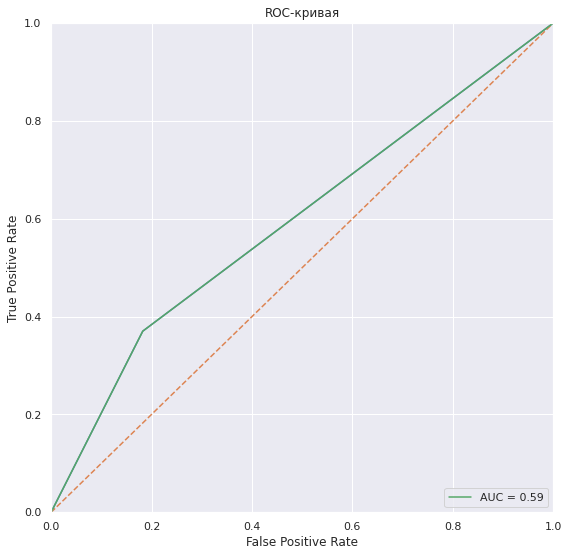

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % auc_roc_dtc)
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid(True)
plt.show()

In [ ]:
data2 = pd.DataFrame({'f1_not_nan':[f1_scores_lr,f1_scores_dtc],
                                    'auc_roc_not_nan':[auc_roc_lr,auc_roc_dtc]},
                                   index=['LogisticRegression','DecisionTreeClassifier'])
data2

,f1_not_nan,auc_roc_not_nan
LogisticRegression,0.448133,0.713933
DecisionTreeClassifier,0.359664,0.593837


In [ ]:
data_full = pd.concat([data, data2], axis=1)

In [ ]:
data_full

,f1_fillnan,auc_roc_fillnan,f1_not_nan,auc_roc_not_nan
LogisticRegression,0.397884,0.659374,0.448133,0.713933
DecisionTreeClassifier,0.335451,0.586759,0.359664,0.593837


# Вывод

После удаления пропусков значение метрик f1 и roc-auc не много выросли, но модели все еще плохо выполняют предсказание.

# Oversampling SMOTE

Попробуем добиться лучших результатов, поборовшись с дисбалансом классов.  
Для увеличения в выборке количества значений положительного класса применим технику SMOTE(Способ передискретизации синтезированных меньшинств). Этот метод создаст синтетические данные вблизи существующих для класса с флагом 1.  
За основу возьмем данные с удаленными пропусками.

In [ ]:
sm = SMOTE (random_state=12345, ratio='minority')
smote_features, smote_target = sm.fit_sample (nn_features, nn_target) 

In [ ]:
smote_features.shape

(10900, 7)

In [ ]:
smote_target.shape

(10900,)

In [ ]:
# отделим 20% данных для тестовой выборки
over_features_train, over_features_test, over_target_train, over_target_test = train_test_split(
    smote_features, smote_target, test_size=0.20, random_state=12345)

In [ ]:
print(smote_features.shape)
print(over_features_train.shape)
print(over_features_test.shape)

(10900, 7)
(8720, 7)
(2180, 7)


## LogisticRegression

In [ ]:
%%time

lr = LogisticRegression(random_state=12345, class_weight='balanced') 
scores_lr = cross_val_score(lr, over_features_train, over_target_train, 
                              scoring='f1', cv=5)
f1_scores_lr = scores_lr.mean()
print('Среднее значение F1 при кросс-валидации LogisticRegression =', f1_scores_lr)

Среднее значение F1 при кросс-валидации LogisticRegression = 0.6350587190121263
CPU times: user 610 ms, sys: 484 ms, total: 1.09 s
Wall time: 598 ms


In [ ]:
lr.fit(over_features_train, over_target_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
f1_scores_lr = f1_score(over_target_test, lr.predict(over_features_test))

In [ ]:
print(classification_report(over_target_test, lr.predict(over_features_test)))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1100
           1       0.70      0.58      0.63      1080

    accuracy                           0.67      2180
   macro avg       0.67      0.67      0.66      2180
weighted avg       0.67      0.67      0.66      2180



In [ ]:
probabilities = lr.predict_proba(over_features_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(over_target_test, probabilities[:,1])

In [ ]:
auc_roc_lr = roc_auc_score(over_target_test, probabilities[:,1])

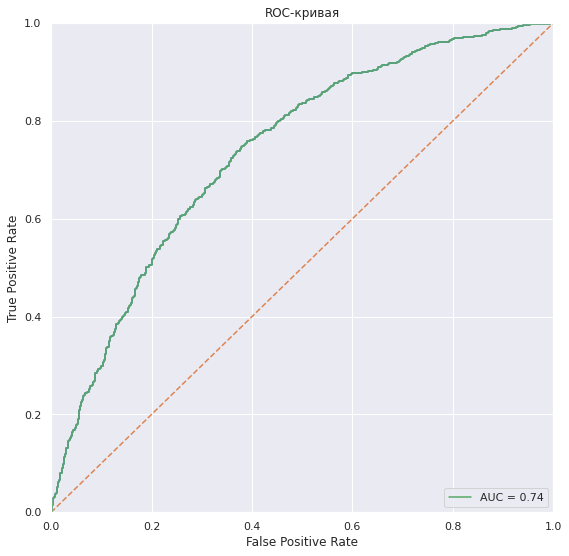

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % auc_roc_lr)
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid(True)
plt.show()

## DecisionTreeClassifier

In [ ]:
%%time

dtc = DecisionTreeClassifier(random_state=12345, class_weight='balanced') 
scores_dtc = cross_val_score(dtc, over_features_train, over_target_train, 
                              scoring='f1', cv=5)
f1_scores_dtc = scores_dtc.mean()
print('Среднее значение F1 при кросс-валидации DecisionTreeClassifier =', f1_scores_dtc)

Среднее значение F1 при кросс-валидации DecisionTreeClassifier = 0.7922532405842257
CPU times: user 256 ms, sys: 1.35 ms, total: 257 ms
Wall time: 263 ms


In [ ]:
dtc.fit(over_features_train, over_target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [ ]:
f1_scores_dtc = f1_score(over_target_test, dtc.predict(over_features_test))

In [ ]:
print(classification_report(over_target_test, dtc.predict(over_features_test)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1100
           1       0.79      0.82      0.80      1080

    accuracy                           0.80      2180
   macro avg       0.80      0.80      0.80      2180
weighted avg       0.80      0.80      0.80      2180



In [ ]:
probabilities = dtc.predict_proba(over_features_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(over_target_test, probabilities[:,1])

In [ ]:
auc_roc_dtc = roc_auc_score(over_target_test, probabilities[:,1])

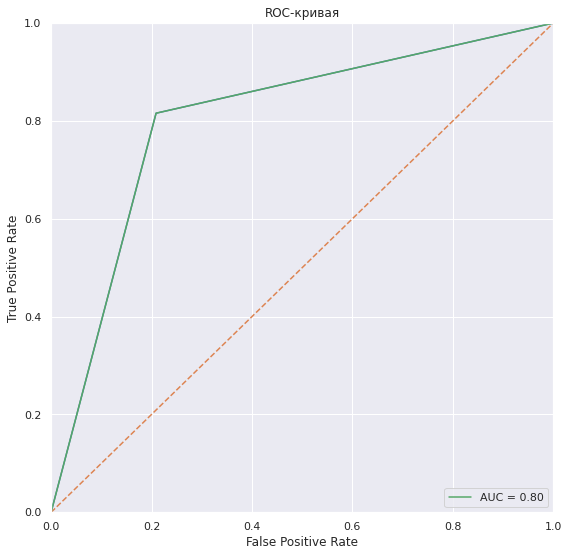

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % auc_roc_dtc)
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid(True)
plt.show()

Оценим важность признаков для модели:

In [ ]:
feature_dtc = pd.DataFrame(sorted(zip(dtc.feature_importances_,nn_features.columns)), columns=['Value','Feature'])
feature_dtc = feature_dtc.sort_values(by="Value", ascending=False).copy()
feature_dtc

,Value,Feature
6,0.348791,predictor_4
5,0.236522,predictor_3
4,0.119096,predictor_1
3,0.110413,predictor_2
2,0.104203,predictor_5
1,0.059364,predictor_6
0,0.021612,predictor_7


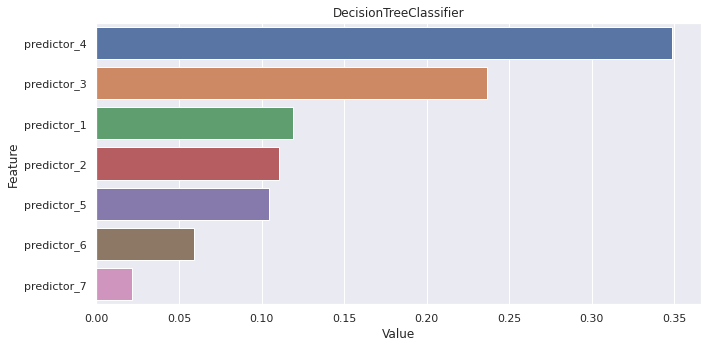

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_dtc)
plt.title('DecisionTreeClassifier')
plt.tight_layout()
plt.show()

In [ ]:
data_smote = pd.DataFrame({'f1_oversamp':[f1_scores_lr,f1_scores_dtc],
                                    'auc_roc_oversamp':[auc_roc_lr,auc_roc_dtc]},
                                   index=['LogisticRegression','DecisionTreeClassifier'])
data_smote

,f1_oversamp,auc_roc_oversamp
LogisticRegression,0.632219,0.737425
DecisionTreeClassifier,0.804199,0.803325


In [ ]:
data_full = pd.concat([data_full, data_smote], axis=1).copy()

In [ ]:
data_full = data_full.reindex(columns=['f1_fillnan', 'f1_not_nan', 'f1_oversamp', 'auc_roc_fillnan','auc_roc_not_nan','auc_roc_oversamp'])

In [ ]:
data_full

,f1_fillnan,f1_not_nan,f1_oversamp,auc_roc_fillnan,auc_roc_not_nan,auc_roc_oversamp
LogisticRegression,0.397884,0.448133,0.632219,0.659374,0.713933,0.737425
DecisionTreeClassifier,0.335451,0.359664,0.804199,0.586759,0.593837,0.803325


Техника Oversampling позволила улучшить метрики, особенно это сказалось на модели **DecisionTreeClassifier**.  

# Классы

## Обучение на 3 предикторах

Оценив важность фич для модели с самыми высокими показателями метрики f1, обучим модель только на 3 наиболее важных предикторах

Создадим класс трансформер совместимый с пайплайном sklearn.
Класс проведет отбор фичей на основании важности для модели *DecisionTreeClassifier*.   

Количество полученных предикторов будет параметром этого класса. По умолчанию количество фичей равно 3.

In [ ]:
class Feature_selection(BaseEstimator, TransformerMixin):

    def __init__(self, n_features = 3):
        self.n_features = n_features



    def fit(self, x, y):
        self.classifire = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
        self.classifire.fit(x, y)
        self.feature_clf = pd.DataFrame(sorted(zip(self.classifire.feature_importances_,list(range(x.shape[1])))), columns=['Value','Feature'])
        self.feature_clf = self.feature_clf.sort_values(by="Value", ascending=False).copy()
        print(f'Максимальное число n_features: {len(self.feature_clf)}')
        
        
        return self



    def transform(self, x,y=None):
        
        
        res = list(self.feature_clf.head(self.n_features).iloc[:,1])
        x = x[:,[res]]
        x = [np.concatenate(i) for i in x]
        


        return x


In [ ]:
%%time
pipe = Pipeline([('fs', Feature_selection(n_features=5)), ('dtc', DecisionTreeClassifier(random_state=12345))])
pipe.fit(over_features_train,over_target_train)
preds = pipe.predict(over_features_train)
preds_proba = pipe.predict_proba(over_features_train)

Максимальное число n_features: 7
CPU times: user 202 ms, sys: 552 µs, total: 202 ms
Wall time: 206 ms


In [ ]:
pipe_f1 = f1_score(over_target_test, pipe.predict(over_features_test))
print(f'Значение F1 DecisionTreeClassifier {pipe_f1}')

Значение F1 DecisionTreeClassifier 0.7965564114182148


In [ ]:
print(classification_report(over_target_test, pipe.predict(over_features_test)))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1100
           1       0.78      0.81      0.80      1080

    accuracy                           0.79      2180
   macro avg       0.79      0.79      0.79      2180
weighted avg       0.79      0.79      0.79      2180



In [ ]:
probabilities = pipe.predict_proba(over_features_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(over_target_test, probabilities[:,1])

In [ ]:
auc_roc_dtc = roc_auc_score(over_target_test, probabilities[:,1])

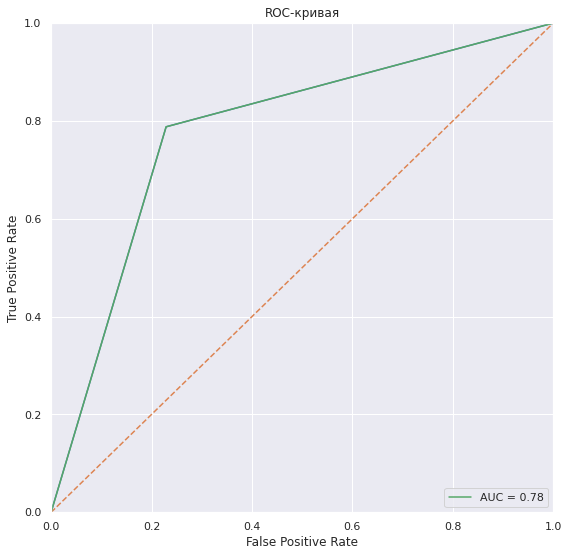

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % auc_roc_dtc)
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid(True)
plt.show()

In [ ]:
data_3_pred = pd.DataFrame({'f1_3pred':[pipe_f1],
                                    'auc_roc_3pred':[auc_roc_dtc]},
                                   index=['DecisionTreeClassifier'])
data_3_pred

,f1_3pred,auc_roc_3pred
DecisionTreeClassifier,0.779661,0.779436


In [ ]:
data_full

,f1_fillnan,f1_not_nan,f1_oversamp,auc_roc_fillnan,auc_roc_not_nan,auc_roc_oversamp
LogisticRegression,0.397884,0.448133,0.632219,0.659374,0.713933,0.737425
DecisionTreeClassifier,0.335451,0.359664,0.804199,0.586759,0.593837,0.803325


# Вывод

В данных присутствуют пропуски в столбцах `predictor 3` и `predictor 6`. Дубликатов нет.

В данных присутствует дисбаланс классов. Доля положительного класса 20%.  

Для подготовки данных к анализу проведено:
* удаление пропусков в данных;
* кодирование категориальных данных методом OrdinalEncoder;
* увеличение количества значений положительного класса методом SMOTE.

Создан класс трансформер совместимый с пайплайном sklearn, с возможностью отбора наиболее важных предикторов.  

Уменьшение кол-ва предикторов с 7 до 3 лишь на ~3% ухудшило метрику f1, но снизило время обучения модели на ~69%.  

**Рекомендации:**
1. Выявить причину возникновения пропусков;
2. Выполнить корректное заполнение пропусков;
3. Переобучить модель на основании уточненных данных;
4. В случае отсутствия необходимости быстрого ответа модели, попробовать обучить другие алгоритмы ML, например CatBoost;
5. С помощью порога в метрике ROC-AUC, возможно регулировать допустимый уровень риска для компании.


